# Machine Learning Challenge

# ProblemStatement :
Predicting the amount that would be deposited in each branch in the year 2017

# LoadingData

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")
# pd.set_option('display.float_format', lambda x: '%.3f' % x) ### It helps to supress scientific notation
# pd.set_option("display.max_rows",None)  ### It helps us to view full dataframe

In [3]:
df.head()

,id,headquarter,location.Code,date_of_establishment,location,loc.details,state,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,deposit_amount_2017
0,1,0,2871,1911-06-02,Wales,Waukesha,WI,32079.0,35971.5,37237.5,40362.0,46021.5,46020.0,69030.00
1,2,0,2872,NaN,Germantown,Washington,WI,83181.0,84846.0,97098.0,110284.5,122035.5,133905.0,200857.50
2,3,0,2873,1908-06-04,Brookfield,Waukesha,WI,136323.0,156450.0,187557.0,188859.0,198751.5,206044.5,309066.75
3,4,0,2874,NaN,Pewaukee,Waukesha,WI,68511.0,73932.0,79876.5,105603.0,112113.0,110755.5,166133.25
4,5,0,2875,NaN,Waukesha,Waukesha,WI,96271.5,108325.5,104880.0,121054.5,113956.5,109837.5,164756.25


In [4]:
df.info() ### This helps us to Know whether there are null values and also helps to see to which type it belongs to

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790 entries, 0 to 3789
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3790 non-null   int64  
 1   headquarter            3790 non-null   int64  
 2   location.Code          3790 non-null   int64  
 3   date_of_establishment  1750 non-null   object 
 4   location               3790 non-null   object 
 5   loc.details            3790 non-null   object 
 6   state                  3790 non-null   object 
 7   deposit_amount_2011    3050 non-null   float64
 8   deposit_amount_2012    3212 non-null   float64
 9   deposit_amount_2013    3461 non-null   float64
 10  deposit_amount_2014    3615 non-null   float64
 11  deposit_amount_2015    3734 non-null   float64
 12  deposit_amount_2016    3771 non-null   float64
 13  deposit_amount_2017    3771 non-null   float64
dtypes: float64(7), int64(3), object(4)
memory usage: 414.7+ 

In [5]:
df.describe()  ## This gives us the summary or statistics of dataframe
               ### Note: The following is only for Dimensions in  dataframe not for measures(only for numerical not for categorical)

,id,headquarter,location.Code,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,deposit_amount_2017
count,3790.000000,3790.0,3790.000000,3.050000e+03,3.212000e+03,3.461000e+03,3.615000e+03,3.734000e+03,3.771000e+03,3.771000e+03
mean,1895.500000,0.0,5395.806332,1.683201e+05,1.882705e+05,1.933803e+05,2.045743e+05,2.183874e+05,2.364422e+05,3.546633e+05
std,1094.223088,0.0,1549.105135,4.196386e+06,5.171073e+06,5.320718e+06,5.610536e+06,5.970416e+06,6.422120e+06,9.633180e+06
min,1.000000,0.0,2871.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,948.250000,0.0,4067.250000,2.839800e+04,3.019912e+04,3.159750e+04,3.497175e+04,3.935850e+04,4.632150e+04,6.948225e+04
50%,1895.500000,0.0,5261.500000,5.344200e+04,5.577450e+04,5.961600e+04,6.353700e+04,7.015800e+04,7.877400e+04,1.181610e+05
75%,2842.750000,0.0,6863.250000,9.910912e+04,1.004205e+05,1.072440e+05,1.145288e+05,1.249448e+05,1.373490e+05,2.060235e+05
max,3790.000000,0.0,7994.000000,2.303660e+08,2.915820e+08,3.110520e+08,3.350930e+08,3.623109e+08,3.919391e+08,5.879087e+08


# NA_Value Check

In [6]:
df.isna().sum()

id                          0
headquarter                 0
location.Code               0
date_of_establishment    2040
location                    0
loc.details                 0
state                       0
deposit_amount_2011       740
deposit_amount_2012       578
deposit_amount_2013       329
deposit_amount_2014       175
deposit_amount_2015        56
deposit_amount_2016        19
deposit_amount_2017        19
dtype: int64

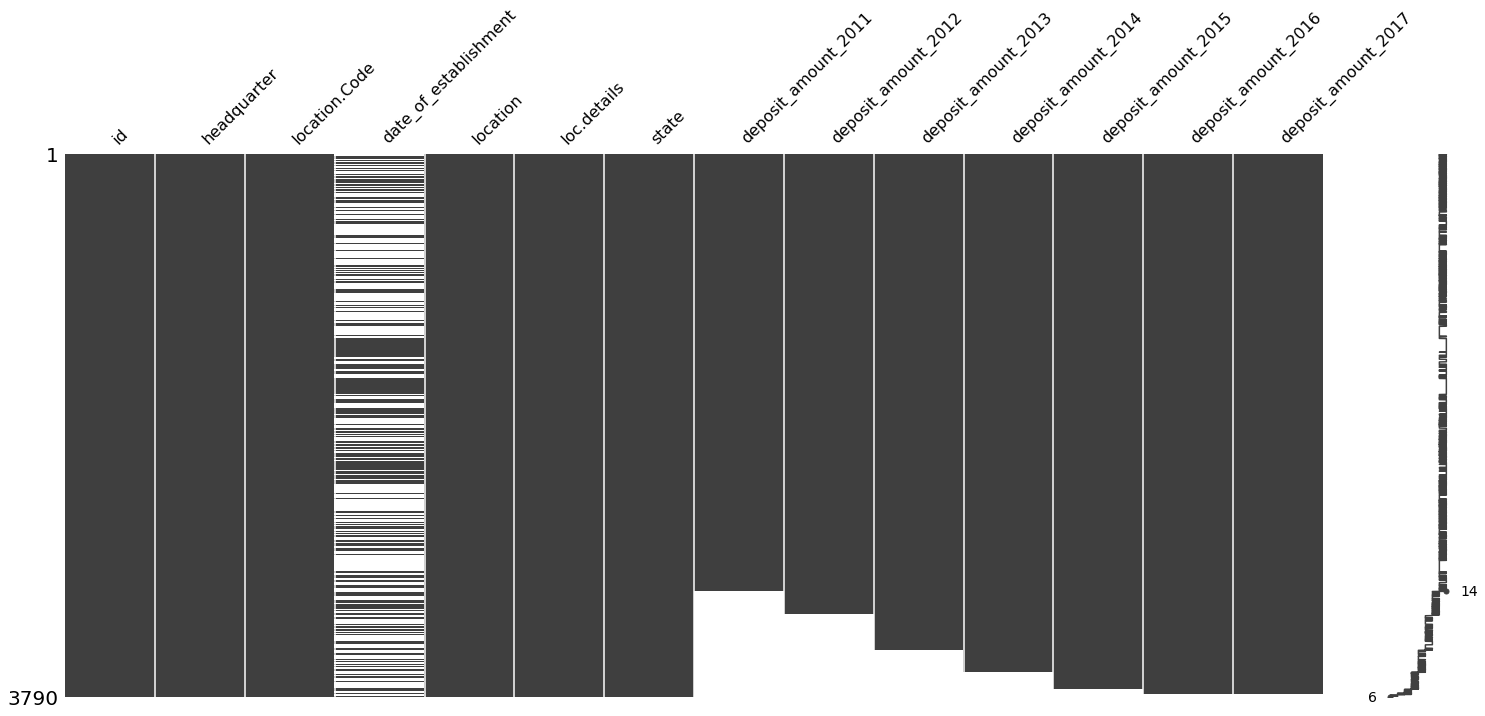

In [7]:
import missingno as ms
ms.matrix(df)

#### From above we can see that there are null values in our dataframe

In [8]:
df.shape

(3790, 14)

In [9]:
### I want to remove the column date_of_establishment because there are 2040 null values which is 53 % of total rows
## If I Fillna with anything(i.e mean,median) then that would lead to biased state
### So I'm removing that Particular Column

In [10]:
df.drop("date_of_establishment",axis=1,inplace=True)
df.head()

,id,headquarter,location.Code,location,loc.details,state,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,deposit_amount_2017
0,1,0,2871,Wales,Waukesha,WI,32079.0,35971.5,37237.5,40362.0,46021.5,46020.0,69030.00
1,2,0,2872,Germantown,Washington,WI,83181.0,84846.0,97098.0,110284.5,122035.5,133905.0,200857.50
2,3,0,2873,Brookfield,Waukesha,WI,136323.0,156450.0,187557.0,188859.0,198751.5,206044.5,309066.75
3,4,0,2874,Pewaukee,Waukesha,WI,68511.0,73932.0,79876.5,105603.0,112113.0,110755.5,166133.25
4,5,0,2875,Waukesha,Waukesha,WI,96271.5,108325.5,104880.0,121054.5,113956.5,109837.5,164756.25


In [11]:
x = df.isna().sum().index[6:]
for i in range(len(x)):
           print(x[i],":",((df.isna().sum().values[6:].tolist()[i]/df.shape[0])*100)) 
        ### This gives us the Percentage of Nullvalues to those of Original
    

deposit_amount_2011 : 19.525065963060687
deposit_amount_2012 : 15.250659630606862
deposit_amount_2013 : 8.680738786279683
deposit_amount_2014 : 4.617414248021108
deposit_amount_2015 : 1.4775725593667546
deposit_amount_2016 : 0.5013192612137204
deposit_amount_2017 : 0.5013192612137204


In [12]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

id                     0
headquarter            0
location.Code          0
location               0
loc.details            0
state                  0
deposit_amount_2011    0
deposit_amount_2012    0
deposit_amount_2013    0
deposit_amount_2014    0
deposit_amount_2015    0
deposit_amount_2016    0
deposit_amount_2017    0
dtype: int64

In [14]:
df.shape

(3050, 13)

In [15]:
df.tail()

,id,headquarter,location.Code,location,loc.details,state,deposit_amount_2011,deposit_amount_2012,deposit_amount_2013,deposit_amount_2014,deposit_amount_2015,deposit_amount_2016,deposit_amount_2017
3046,3047,0,7129,Chino,San Bernardino,CA,11058.0,17970.0,28846.5,35188.5,40969.5,48484.5,72726.75
3047,3048,0,7130,North Hollywood,Los Angeles,CA,7551.0,22644.0,34785.0,36069.0,43212.0,48201.0,72301.50
3048,3049,0,7131,Flushing,Queens,NY,1965.0,26412.0,48231.0,75223.5,99627.0,112281.0,168421.50
3049,3050,0,7132,Chicago,Cook,IL,137490.0,146374.5,167772.0,182842.5,194668.5,216586.5,324879.75
3050,3051,0,7134,Brick,Ocean,NJ,21154.5,37044.0,50815.5,79860.0,94587.0,114012.0,171018.00


# Now We can Apply Some MachineLearning Algorithms For Predictions

# Linear Regression is an Algorithm which his helpful for Prediction as it is a Predictive Modelling Technique

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [424]:
df.columns

Index(['id', 'headquarter', 'location.Code', 'location', 'loc.details',
       'state', 'deposit_amount_2011', 'deposit_amount_2012',
       'deposit_amount_2013', 'deposit_amount_2014', 'deposit_amount_2015',
       'deposit_amount_2016', 'deposit_amount_2017'],
      dtype='object')

In [115]:
x = df[[ 'deposit_amount_2011', 'deposit_amount_2012',
       'deposit_amount_2013', 'deposit_amount_2014', 'deposit_amount_2015',
       'deposit_amount_2016']]
y = df[['deposit_amount_2017']]

In [116]:
lr.fit(x,y)

LinearRegression()

In [117]:
df1 = pd.read_csv("test.csv")

In [118]:
df1.columns

Index(['id', 'headquarter', 'location.Code', 'date_of_establishment',
       'location', 'loc.details', 'state', 'deposit_amount_2011',
       'deposit_amount_2012', 'deposit_amount_2013', 'deposit_amount_2014',
       'deposit_amount_2015', 'deposit_amount_2016'],
      dtype='object')

In [119]:
df1["location.Code"].unique()

array([   5,    7,    8, ..., 2868, 2869, 2870], dtype=int64)

In [120]:
df1.isna().sum()

id                         0
headquarter                0
location.Code              0
date_of_establishment    814
location                   0
loc.details                0
state                      0
deposit_amount_2011        0
deposit_amount_2012        0
deposit_amount_2013        0
deposit_amount_2014        0
deposit_amount_2015        0
deposit_amount_2016        0
dtype: int64

In [121]:
x1 =  df1[['deposit_amount_2011',
       'deposit_amount_2012', 'deposit_amount_2013', 'deposit_amount_2014',
       'deposit_amount_2015', 'deposit_amount_2016']]

In [122]:
pd.set_option("display.float_format",lambda x: '%.3f' % x)
y_pred = pd.DataFrame(lr.predict(x1))
y_pred.head()
y_pred["id"] = df1["id"]
y_pred.columns = ["deposit_amount_2017_Predicted","id"]
y_pred = y_pred[y_pred.columns.reindex(["id","deposit_amount_2017_Predicted"])[0]]
y_pred

,id,deposit_amount_2017_Predicted
0,1,2406206250.000
1,2,768318.750
2,3,590523.750
3,4,262737.000
4,5,502200.000
...,...,...
1618,1619,229149.000
1619,1620,225504.000
1620,1621,206923.500
1621,1622,183485.250


In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
rfr = RandomForestRegressor(n_estimators = 100,random_state = 42)

In [108]:
rfr.fit(x,y)

C:\Users\aakas\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(random_state=42)

In [109]:
pd.DataFrame(rfr.predict(x1))

,0
0,402630340.928
1,770107.230
2,593524.238
3,262800.900
4,501520.005
...,...
1618,229523.378
1619,225366.728
1620,206982.405
1621,183559.612


In [110]:
y_pred_rf = pd.DataFrame(rfr.predict(x1))
y_pred_rf.head()
y_pred_rf["id"] = df1["id"]
y_pred_rf.columns = ["deposit_amount_2017","id"]
y_pred_rf = y_pred_rf[y_pred_rf.columns.reindex(["id","deposit_amount_2017"])[0]]
y_pred_rf

,id,deposit_amount_2017
0,1,402630340.928
1,2,770107.230
2,3,593524.238
3,4,262800.900
4,5,501520.005
...,...,...
1618,1619,229523.378
1619,1620,225366.728
1620,1621,206982.405
1621,1622,183559.612


In [111]:
y_pred_rf.to_csv("D:/Hakothon(July-12)/y_pred_rf_dropna.csv")

In [112]:
from sklearn.metrics import mean_squared_error

In [113]:
mean_squared_error(y_pred,y_pred_rf)

1246822387955039.8